**Core Task 1**

Calculate the far-field diffraction pattern for a narrow slit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

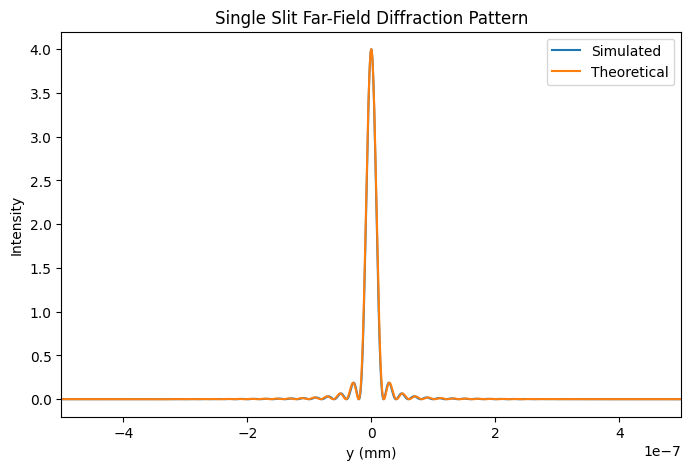

In [2]:
# Set constants
wavelength = 500e-9
slit_width = 100e-6
screen_distance = 1.0
aperture_size = 5e-3
screen_size = 0.05

# Make the aperture
N = 10000
x_coords = np.linspace(-aperture_size/2, aperture_size/2, N)

aperture = np.zeros(N, dtype=complex)
aperture[np.abs(x_coords) < slit_width/2] = 1

def fraunhofer(aperture, wavelength, screen_distance, screen_size):
  """
  Calculates the Fraunhofer diffraction pattern for a given complex aperture.

  Returns a tuple containing a numpy array of y-coordinates and a numpy array of diffraction pattern intensities.
  """
  k = 2 * np.pi / wavelength
  dy = screen_size / N
  ky_coords = np.arange(-N/2, N/2) * dy / screen_distance

  diff_pattern_amplitude = scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(aperture)))
  diff_pattern = np.abs(diff_pattern_amplitude)**2 / N

  y_coords = ky_coords * wavelength * screen_distance / (2 * np.pi)
  return y_coords, diff_pattern

# Extract result of fraunhofer function
y_coords, diff_pattern = fraunhofer(aperture, wavelength, screen_distance, screen_size)

# Model theoretical expectation (sinc)
scaling_factor = 78000000
theoretical = np.sinc(y_coords * slit_width / wavelength / screen_distance * np.pi * scaling_factor) ** 2 * 4 # With scaling added

plt.figure(figsize=(8, 5))
plt.plot(y_coords * 1e3, diff_pattern, label='Simulated')
plt.plot(y_coords * 1e3, theoretical, label='Theoretical')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.xlim(-0.0000005,0.0000005)
#plt.ylim(0,1)
plt.title('Single Slit Far-Field Diffraction Pattern')
plt.legend()
plt.show()

**Conclusions**

Modelled the far-field diffraction pattern of a single slit aperture. Demonstrated agreement between the numerical simulation and the theoretical solution as seen in the plot.

**Core Task 2**

Far-Field Diffraction Pattern Sinusoidal Phase Grating

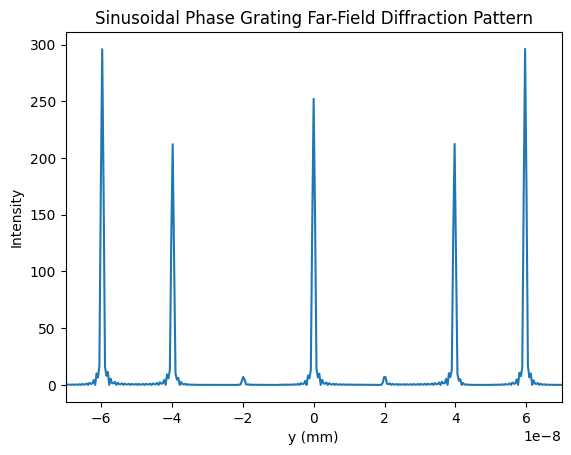

In [3]:
# Set constants
wavelength = 500e-9
slit_width = 2e-3
screen_distance = 10
screen_size = 0.05
aperture_size = 5e-3
s = 100e-6 # spacing of phase maxima
m = 8

# Make the aperture
N = 10000
x_coords = np.linspace(-aperture_size/2, aperture_size/2, N)

aperture = np.zeros(N, dtype=complex)
aperture[np.abs(x_coords) < slit_width/2] = 1

# Phase modulation part of apperture
phase_mod = (m/2) * np.sin(2 * np.pi * x_coords / s)
phase_mod_selection = phase_mod[np.abs(x_coords) < slit_width/2] # selecting relevant values within the extent of the slit

aperture[np.abs(x_coords) < slit_width/2] *= np.exp(1j * phase_mod_selection) # Applying the phase modulation

def fraunhofer(aperture, wavelength, screen_distance, screen_size):
  """
  Calculates the Fraunhofer diffraction pattern for a given complex aperture.

  Returns a tuple containing a numpy array of y-coordinates and a numpy array of diffraction pattern intensities.
  """
  k = 2 * np.pi / wavelength
  dy = screen_size / N
  ky_coords = np.arange(-N/2, N/2) * dy / screen_distance

  diff_pattern_amplitude = scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(aperture)))
  diff_pattern = np.abs(diff_pattern_amplitude)**2 / N

  y_coords = ky_coords * wavelength * screen_distance / (2 * np.pi)
  return y_coords, diff_pattern

# Extract result of fraunhofer function
y_coords, diff_pattern = fraunhofer(aperture, wavelength, screen_distance, screen_size)

plt.figure()
plt.plot(y_coords * 1e3, diff_pattern, label = 'Diffraction Pattern')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.xlim(-0.00000007, 0.00000007)
plt.title('Sinusoidal Phase Grating Far-Field Diffraction Pattern')
plt.show()

**Conclusions**

Created an aperture representing a sinusoidal phase grating.

We see multiple principal maxima as well as subsidiary maxima inbetween.

Also note that the principal maxima are not very sharp as they exhibit visible variations in the intensity before decreasing to zero.

**Core Task 3**



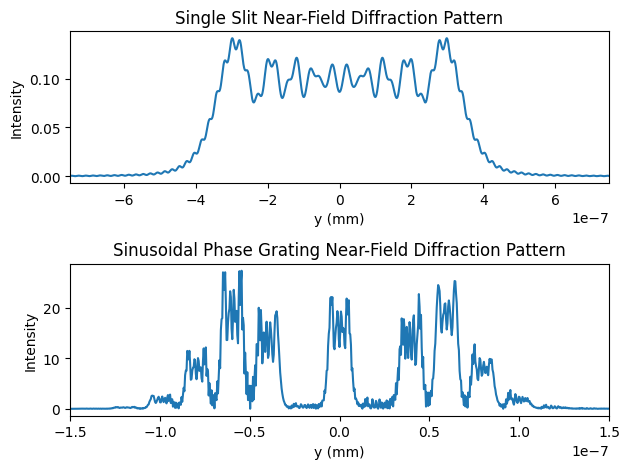

In [4]:
# Set constants (screen distance and slit width will only apply to the single slit)
wavelength = 500e-9
slit_width = 100e-6
screen_distance = 5e-4
screen_size = 0.05
aperture_size = 5e-3
s = 100e-6 # spacing of phase maxima
m = 8

# Make the aperture
N = 10000
x_coords = np.linspace(-aperture_size/2, aperture_size/2, N)

aperture = np.zeros(N, dtype=complex)
aperture[np.abs(x_coords) < slit_width/2] = 1


def fresnel(aperture, wavelength, screen_distance, screen_size):
  """
  Calculates the near-field diffraction pattern for a given complex aperture.

  Returns a tuple containing a numpy array of y-coordinates and a numpy array of diffraction pattern intensities.
  """
  k = 2 * np.pi / wavelength
  dy = screen_size / N
  ky_coords = np.arange(-N/2, N/2) * dy / screen_distance

  x_coords = np.linspace(-aperture_size/2, aperture_size/2, N)

  phase_correction = np.exp(1j * k * x_coords**2 / (2 * screen_distance))
  aperture *= phase_correction

  diff_pattern_amplitude = scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(aperture)))
  diff_pattern = np.abs(diff_pattern_amplitude)**2 / N

  y_coords = ky_coords * wavelength * screen_distance / (2 * np.pi)
  return y_coords, diff_pattern

# Extract result of fresnel function for single slit and save using np.savez
y_coords, diff_pattern = fresnel(aperture, wavelength, screen_distance, screen_size)
np.savez('diff-data', single_slit_coords=y_coords, single_slit_diff_pattern = diff_pattern)

# Changing slit width and screen distance for the phase grating case and determining the new aperture
slit_width = 2e-3
screen_distance = 0.5
aperture[np.abs(x_coords) < slit_width/2] = 1

# Phase modulation part of apperture
phase_mod = (m/2) * np.sin(2 * np.pi * x_coords / s)
phase_mod_selection = phase_mod[np.abs(x_coords) < slit_width/2] # selecting relevant values within the extent of the slit

aperture[np.abs(x_coords) < slit_width/2] *= np.exp(1j * phase_mod_selection) # Applying the phase modulation

# Extract result of fresnel function for phase grating
phase_grating_coords, phase_grating_diff_pattern = fresnel(aperture, wavelength, screen_distance, screen_size)

# Loading data
my_data = np.load('diff-data.npz')

# single slit plot
plt.subplot(2, 1, 1)
plt.plot(my_data['single_slit_coords'] * 1e3, my_data['single_slit_diff_pattern'], label = 'Diffraction Pattern')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.xlim(-0.00000075, 0.00000075)
plt.title('Single Slit Near-Field Diffraction Pattern')

# phase grating plot
plt.subplot(2, 1, 2)
plt.plot(phase_grating_coords * 1e3, phase_grating_diff_pattern, label = 'Diffraction Pattern')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.xlim(-0.00000015, 0.00000015)
plt.title('Sinusoidal Phase Grating Near-Field Diffraction Pattern')
plt.tight_layout()
plt.show()

**Conclusions**

Determined the near-field diffraction patterns for both the single slit and the sinusoidal phase grating.

Plotted the diffraction patterns and we see what we expect in both cases.

I have set $D=0.5mm$ for the single slit as the near-field diffraction pattern is more clear at this distance.



**Supplementary Task 1**

 Evaluate Fresnel integrals.

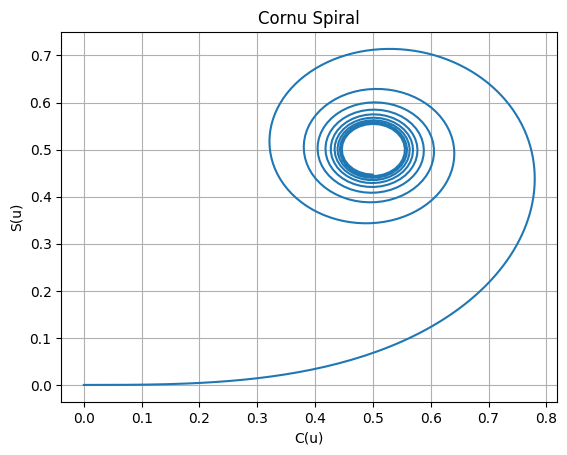

In [5]:
def fresnel_int_C(u):
  # Evaluates the Fresnel integral C(u) using numerical integration.
  def integrand(fx):
    return np.cos(np.pi * fx**2 / 2)

  return scipy.integrate.quad(integrand, 0, u)[0]

def fresnel_int_S(u):
  # Evaluates the Fresnel integral S(u) using numerical integration.
  def integrand(fx):
    return np.sin(np.pi * fx**2 / 2)

  return scipy.integrate.quad(integrand, 0, u)[0]

# Setting the maximum value of u that will be used in the integration and how fine the sampling points are.
max_u = 6
sample_points = 500

# Making list of u_values and evaluating C(u) and S(u) at each of those values.
u_values = np.linspace(0, max_u, sample_points)
C_values = [fresnel_int_C(u) for u in u_values]
S_values = [fresnel_int_S(u) for u in u_values]

plt.plot(C_values, S_values)
plt.xlabel('C(u)')
plt.ylabel('S(u)')
plt.title('Cornu Spiral')
plt.grid(True)
plt.show()

**Conclusions**

Used scipy.integrate.quad to evaluate $C(u)$ and $S(u)$.

Plotted $S(u)$ against $C(u)$ to obtain the Cornu spiral.